<center><font size = "10"> Week 8 - Synapses <center>
<center><font size = "8">Home work - Solutions<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member1: Laura TESTA
<br>Group member2: Alice ALBRECHT
<br>Group member3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

In [1]:
import neuron
from neuron import h
import numpy
import matplotlib.pyplot as plt

%matplotlib inline

# Load external files & initialize
neuron.h.load_file("stdrun.hoc")
neuron.h.stdinit()

--No graphics will be displayed.


0.0

## Optional: Plot the dependence of the NMDA conductance on the Mg2+ concentration.

<font sie='3'>Create a single compartmental soma neuron to host the synpase modeled in SimpleAMPA_NMDA.mod file. Using the stimulation pattern and the values for the synaptic conductances used in tutorial 01, plot the NMDA conductance at different mM [Mg2+] values. Select appropiate values to explore the dynamics. 
    
<font sie='3'> What happens to the NMDA conducatance in relation to Mg2+? What is the functional purpose of this behaviour?

# <font color= 'red'>Ex 1:</font>  Configure a facilitating synapse (E1)
    
<font size='3'> Create a single compartmental soma neuron, add to it passive properties, add to the center of the neuron a synapse with the mechanism modeled in TsodyksMarkram_AMPA_NMDA.mod file, inject a stimulation pattern and define the conductances for NMDA and AMPA receptors, as it was done in tutorial 02. 

<font size='3'>Find the values for `U1`, `tau_rec` and `tau_facil` that would make the synapse behave as a facilitating synapse and plot the `R`, `Use` and conductance curves. Write a definition of `U1`, `tau_rec` and `tau_facil`.
    
<font size='3'>Plot comparison (histograms) between the three parameters in three types on synapses (facilitating, depressing and pseudolinear from Tutorial 2) and briefly interpret them. Is there relationship between the parameters and variables depending on the synapse type?
    
 
    
<font size='3'><font color= 'red'>[1.5 pts]</font>

### A neuron to host the synapse

In [2]:
soma = neuron.h.Section()
soma.L = 40
soma.diam = 40
soma.insert("pas")

__nrnsec_0x38ec510

In [3]:
# Configure the passive biophysics
for sec in h.allsec():
    sec.Ra = 100
    sec.cm = 1

In [4]:
synapse = h.TsodyksMarkram_AMPA_NMDA(soma(0.5))

### Define the stimulus:

In [5]:
stimulator = h.VecStim()
spike_times = [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 950.0]
spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector)

connection = h.NetCon(stimulator, synapse)
connection.weight[
    0
] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file

### Create a recorder for the synaptic conductance, current, the soma voltage, and the time intervals

In [6]:
g_syn = h.Vector()
g_syn.record(synapse._ref_g)
i_syn = h.Vector()
i_syn.record(synapse._ref_i)
v_soma = h.Vector()
v_soma.record(soma(0.5)._ref_v)
time = h.Vector()
time.record(neuron.h._ref_t)
R_syn = h.Vector()
R_syn.record(synapse._ref_R)
Use_syn = h.Vector()
Use_syn.record(synapse._ref_Use)

Vector[6]

### AMPA and NMDA conductances

In [7]:
synapse.gmax_AMPA = 0.002  # uS
synapse.gmax_NMDA = (
    0.7 * 0.002
)  # uS - 0.7 is a biologically typical ratio of NMDA to AMPA conductance
synapse.mg = 1.0  # mM

### Facilitating synapse (E1)

In [22]:
synapse.U1 = 0.1 # Baseline release probability
synapse.tau_rec = 700 # ms - recovery from depression
synapse.tau_facil = 350 # ms - relaxation from facilitation

h.tstop = 1000.0 # ms
neuron.h.run()

0.0

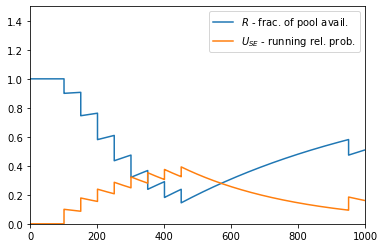

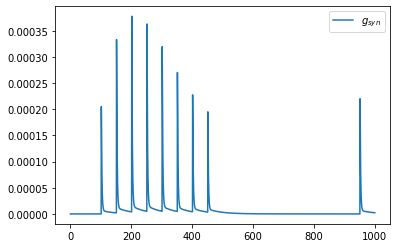

In [24]:
plt.figure()
plt.plot(time, R_syn, label='$R$ - frac. of pool avail.')
plt.plot(time, Use_syn, label='$U_{SE}$ - running rel. prob.')
plt.legend()
plt.axis([0,1000,0,1.5])

plt.figure()
plt.plot(time, g_syn, label="$g_{syn}$")
plt.legend()

# <font color= 'red'>Ex 2:</font>  Compute EPSP's Features: amplitudes, latencies, tau rise and Coefficient of Variation (CV) of the EPSP amplitudes 

<font size='3'>Compute the amplitudes, latencies and tau rise of the excitatory postsynaptic potential (EPSP) of the three connections traces provided for your group (.h5 files you can find in the group folder). Visualize the mean values and standard deviations of this features.


<font size='3'>Then compute the coefficient of variation of EPSP amplitudes for each of the connections and the mean CV profile between them. Visualize your results in two plots:
- mean CV profiles: the plot should have four curves, one per each connection and one for the mean
- raster plot of CV of EPSP amplitudes as a function of EPSP amplitudes (all EPSPS, not only the first one)

<font size='3'>Both plots should look similar to the ones in the paper show in the lecture [Barros-Zulaica et al., 2019](https://www.ncbi.nlm.nih.gov/pubmed/31680928). 
    
<font size='3'>*Hint: Be careful with which plot should have a standard deviations*

<font size='3'><font color= 'red'>[2.5 pts]</font>

# <font color='red'>Ex 3:</font> Compute failure rate

<font size='3'>Compute the failure rate of the EPSPs from the connections of your group folder. The failure rate is the fraction of trials from which no PSP is generated above certain threshold. You can find a way of computing the failure rate in [Feldmeyer et al., 1999](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2269646/). Make sure to test for failure based both latency and amplitude size. Necessary noise can be extracted from the initial part of the simulation, before any stimulus arrives. 

    
<font size='3'>Represent the mean result of the three connections in a bar plot. For each connection visualize the distributions of the EPSPs amplitudes with split between the success and failure cases.  

<font size='3'><font color= 'red'>[2 pts]</font>